In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('boardgames_top200.csv')
df

,Rank,Title,Year,Rating,Avg_Rating,Voters
0,1,Brass: Birmingham,2018,8.402,8.58,51834
1,2,Pandemic Legacy: Season 1,2015,8.364,8.52,55509
2,3,Ark Nova,2021,8.345,8.54,52095
3,4,Gloomhaven,2017,8.327,8.56,64782
4,5,Twilight Imperium: Fourth Edition,2017,8.229,8.58,25993
...,...,...,...,...,...,...
195,96,Lords of Waterdeep,2012,7.587,7.73,57457
196,97,El Grande,1995,7.587,7.76,31040
197,98,Wingspan Asia,2022,7.585,8.25,8066
198,99,Great Western Trail: New Zealand,2023,7.583,8.53,5093


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        200 non-null    int64  
 1   Title       200 non-null    object 
 2   Year        200 non-null    int64  
 3   Rating      200 non-null    float64
 4   Avg_Rating  200 non-null    float64
 5   Voters      200 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


,Rank,Year,Rating,Avg_Rating,Voters
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,50.500000,2015.380000,7.818360,8.153800,32948.120000
std,28.938507,14.937579,0.200583,0.264088,23544.179033
min,1.000000,1876.000000,7.580000,7.730000,4700.000000
25%,25.750000,2015.000000,7.667000,7.960000,15347.500000
50%,50.500000,2017.000000,7.762000,8.100000,25877.500000
75%,75.250000,2020.000000,7.935000,8.352500,47706.000000
max,100.000000,2024.000000,8.402000,8.860000,106061.000000


In [4]:
df=df.rename(columns={'Rating':'Geek_Ratings','Avg_Rating':'Avg_Ratings'})
print(df['Year'].value_counts().sort_index().tail(10))

Year
2015    18
2016    22
2017    20
2018    16
2019    18
2020    14
2021    10
2022    12
2023    16
2024     8
Name: count, dtype: int64


C:\Users\ashut\AppData\Local\Temp\ipykernel_18012\3293110784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y="Title", x="Geek_Ratings", palette="viridis")


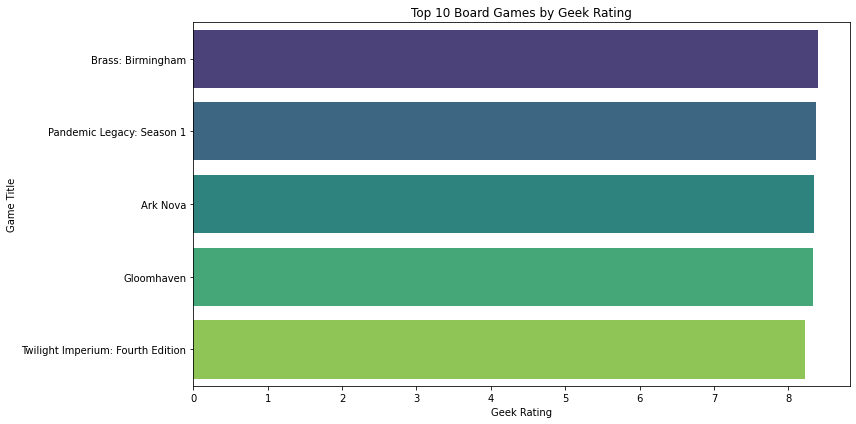

In [5]:
# Top 10 Rated Games
top10 = df.sort_values(by="Geek_Ratings", ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top10, y="Title", x="Geek_Ratings", palette="viridis")
plt.title("Top 10 Board Games by Geek Rating")
plt.xlabel("Geek Rating")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

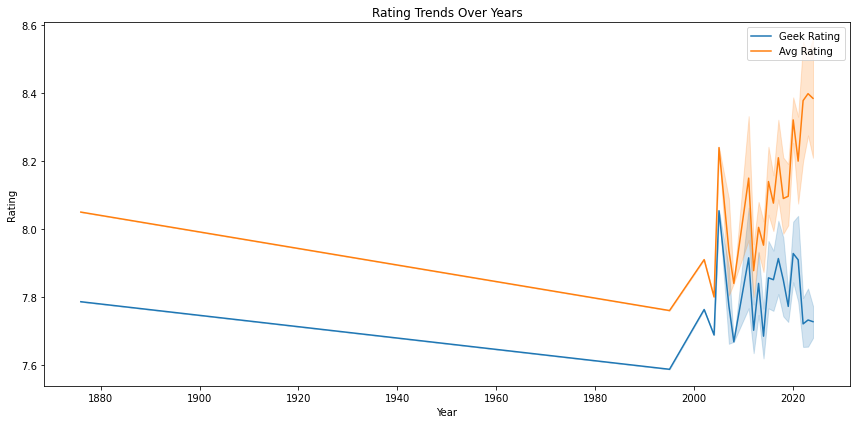

In [6]:
# Rating Trends Over Years
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Year", y="Geek_Ratings", label="Geek Rating")
sns.lineplot(data=df, x="Year", y="Avg_Ratings", label="Avg Rating")
plt.title("Rating Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend()
plt.tight_layout()
plt.show()

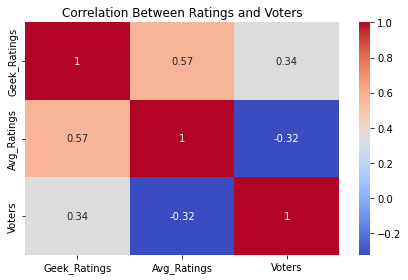

In [7]:
#Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[["Geek_Ratings", "Avg_Ratings", "Voters"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Ratings and Voters")
plt.tight_layout()
plt.show()

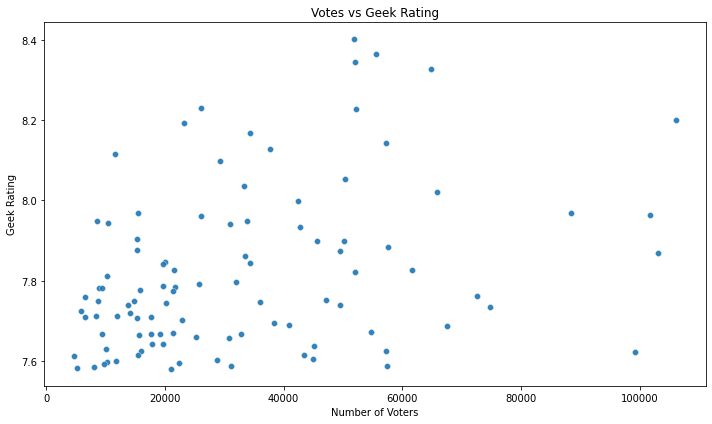

In [8]:
#Votes vs Rating Scatter
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Voters", y="Geek_Ratings", alpha=0.7)
plt.title("Votes vs Geek Rating")
plt.xlabel("Number of Voters")
plt.ylabel("Geek Rating")
plt.tight_layout()
plt.show()

In [9]:
df.to_csv('boardgames_cleaned.csv', index=False)